# Cat vs Non-cat Classifier using keras library and tensorflow as backend

## Loading Data from hdf file

In [1]:
import h5py
filename = 'train_catvnoncat.h5'
f = h5py.File(filename, 'r')

In [2]:
list(f.keys())

['list_classes', 'train_set_x', 'train_set_y']

In [3]:
data = list(f['train_set_x'])

In [4]:
import numpy as np
X_tr=np.array(data)

## Printing some of the imaages

(64, 64, 3)


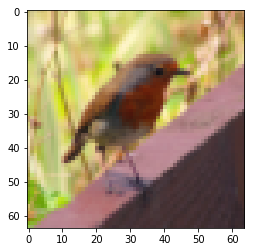

(64, 64, 3)


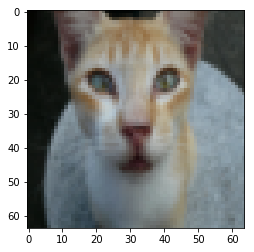

(64, 64, 3)


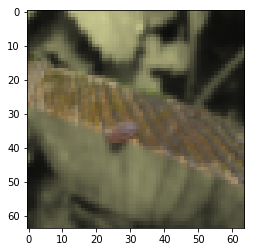

(64, 64, 3)


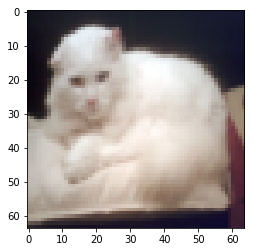

(64, 64, 3)


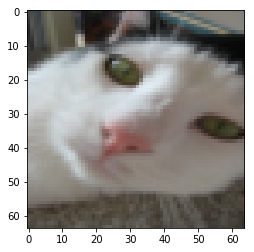

In [8]:
import matplotlib.pyplot as plt
for i in range(10,15):
    print(data[i].shape)
    plt.imshow(data[i])
    plt.show()

In [9]:
list(f.keys())

['list_classes', 'train_set_x', 'train_set_y']

In [10]:
y_tr= np.array(list(f['train_set_y']))

## Visualizing how many are of them are cat and non-cat images

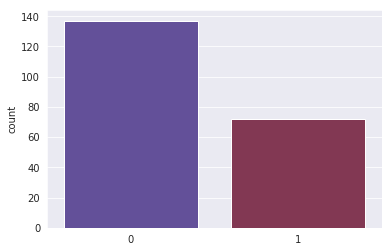

In [13]:
import seaborn as sns
sns.set_style('darkgrid')
sns.countplot(y_tr,palette='twilight')

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_val,Y_train,Y_val = train_test_split(X_tr,y_tr,test_size = 0.1)
print('Shape of train set feature',X_train.shape)
print('Shape of validation set feature',X_val.shape)
print('Shape of train set label',Y_train.shape)
print('Shape of validation set label',Y_val.shape)
del X_tr
del y_tr
ntrain = len(X_train)
nval = len(X_val)

Shape of train set feature (188, 64, 64, 3)
Shape of validation set feature (21, 64, 64, 3)
Shape of train set label (188,)
Shape of validation set label (21,)


In [15]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

In [16]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape=(64,64,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 128)         1

In [46]:
model.compile(loss='binary_crossentropy',optimizer='adagrad',metrics=['accuracy'])

In [47]:
model.fit(X_train, Y_train,validation_data = (X_val, Y_val),epochs=100, batch_size=16)

Train on 188 samples, validate on 21 samples
Epoch 1/100
188/188 [==============================] - 1s 7ms/sample - loss: 0.0235 - accuracy: 0.9947 - val_loss: 1.5284 - val_accuracy: 0.7619
Epoch 2/100
188/188 [==============================] - 1s 5ms/sample - loss: 0.0013 - accuracy: 1.0000 - val_loss: 1.8817 - val_accuracy: 0.7619
Epoch 3/100
188/188 [==============================] - 1s 4ms/sample - loss: 0.0126 - accuracy: 0.9947 - val_loss: 2.3639 - val_accuracy: 0.6667
Epoch 4/100
188/188 [==============================] - 1s 4ms/sample - loss: 0.0039 - accuracy: 1.0000 - val_loss: 2.3178 - val_accuracy: 0.7619
Epoch 5/100
188/188 [==============================] - 1s 5ms/sample - loss: 0.0016 - accuracy: 1.0000 - val_loss: 2.1811 - val_accuracy: 0.7143
Epoch 6/100
188/188 [==============================] - 1s 5ms/sample - loss: 2.3252e-04 - accuracy: 1.0000 - val_loss: 2.2090 - val_accuracy: 0.7143
Epoch 7/100
188/188 [==============================] - 1s 5ms/sample - loss: 4.85

# Visualizing loss, accuracy,val_loss,val_accuracy of Model1

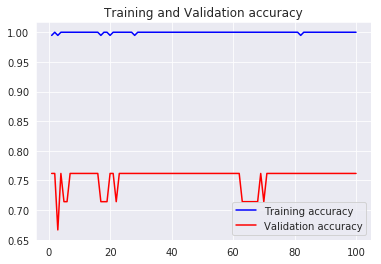

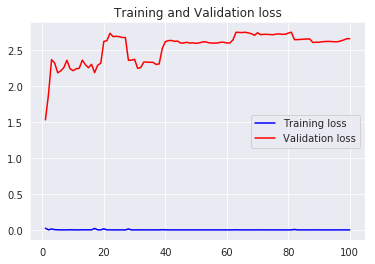

In [73]:
acc = model.history.history['accuracy']
val_acc = model.history.history['val_accuracy']
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label= 'Training accuracy')
plt.plot(epochs, val_acc, 'r', label= 'Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'b', label= 'Training loss')
plt.plot(epochs, val_loss, 'r', label= 'Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

# Saving first trained model

In [63]:
model.save_weights('model1_wieghts.h5')
model.save('model1_keras.h5')

# loading testing data

In [21]:
file = 'test_catvnoncat.h5'
fil = h5py.File(file, 'r')

In [22]:
group_key = list(fil.keys())

In [23]:
group_key

['list_classes', 'test_set_x', 'test_set_y']

In [24]:
test=np.array(fil['test_set_x'])

## Predicting with first model

In [48]:
pred = model.predict(test)

In [49]:
preds= []
for i in pred:
    if i>=0.5:
        preds.append(1)
    else:
        preds.append(0)

## Checking Accuracy with predictions from model1

In [34]:
y_test = np.array(fil['test_set_y'])

In [50]:
sum(preds)/sum(y_test)

0.8181818181818182

### Hence here we got 81% accuracy

## Now Using Batch Normalization with same number of layers and activation units

In [56]:
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape=(64,64,3),use_bias=False))
model2.add(layers.BatchNormalization())
model2.add(layers.MaxPooling2D((2,2)))
model2.add(layers.BatchNormalization())
model2.add(layers.Conv2D(64, (3,3), activation = 'relu',use_bias=False))
model2.add(layers.BatchNormalization())
model2.add(layers.MaxPooling2D((2,2)))
model2.add(layers.BatchNormalization())
model2.add(layers.Conv2D(128, (3,3), activation = 'relu',use_bias=False))
model2.add(layers.BatchNormalization())
model2.add(layers.MaxPooling2D((2,2)))
model2.add(layers.BatchNormalization())
model2.add(layers.Conv2D(128, (3,3), activation = 'relu',use_bias=False))
model2.add(layers.BatchNormalization())
model2.add(layers.MaxPooling2D((2,2)))
model2.add(layers.BatchNormalization())
model2.add(layers.Flatten())
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(512,activation='relu',use_bias=False))
model2.add(layers.BatchNormalization())
model2.add(layers.Dense(1,activation='sigmoid'))

### Compiling our model

In [57]:
model2.compile(loss='binary_crossentropy',optimizer='adagrad',metrics=['accuracy'])

### checking summary of model2

In [58]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 62, 62, 32)        864       
_________________________________________________________________
batch_normalization_v2_9 (Ba (None, 62, 62, 32)        128       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
batch_normalization_v2_10 (B (None, 31, 31, 32)        128       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 29, 29, 64)        18432     
_________________________________________________________________
batch_normalization_v2_11 (B (None, 29, 29, 64)        256       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 64)       

### Fiiting our training data on model with 100 epochs and batch size of 16

In [59]:
model2.fit(X_train, Y_train,validation_data = (X_val, Y_val),epochs=100, batch_size=16)

Train on 188 samples, validate on 21 samples
Epoch 1/100
188/188 [==============================] - 3s 16ms/sample - loss: 0.7018 - accuracy: 0.6223 - val_loss: 2.5215 - val_accuracy: 0.5238
Epoch 2/100
188/188 [==============================] - 2s 8ms/sample - loss: 0.4732 - accuracy: 0.7979 - val_loss: 1.7293 - val_accuracy: 0.5238
Epoch 3/100
188/188 [==============================] - 2s 8ms/sample - loss: 0.3418 - accuracy: 0.8404 - val_loss: 1.1061 - val_accuracy: 0.5238
Epoch 4/100
188/188 [==============================] - 2s 8ms/sample - loss: 0.2916 - accuracy: 0.8564 - val_loss: 0.7990 - val_accuracy: 0.5238
Epoch 5/100
188/188 [==============================] - 2s 9ms/sample - loss: 0.2874 - accuracy: 0.8883 - val_loss: 0.6800 - val_accuracy: 0.5238
Epoch 6/100
188/188 [==============================] - 2s 8ms/sample - loss: 0.2374 - accuracy: 0.8989 - val_loss: 0.6961 - val_accuracy: 0.5238
Epoch 7/100
188/188 [==============================] - 2s 9ms/sample - loss: 0.1855 

# Visualizing loss, accuracy,val_loss,val_accuracy of Model2

In [71]:
model2.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

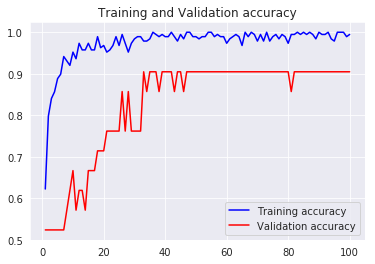

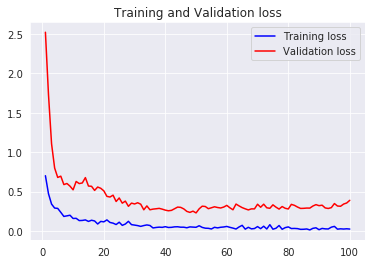

In [72]:
acc = model2.history.history['accuracy']
val_acc = model2.history.history['val_accuracy']
loss = model2.history.history['loss']
val_loss = model2.history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label= 'Training accuracy')
plt.plot(epochs, val_acc, 'r', label= 'Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'b', label= 'Training loss')
plt.plot(epochs, val_loss, 'r', label= 'Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

# Predicting with trained model2

In [60]:
pred2 = model2.predict(test)

In [61]:
preds2= []
for i in pred2:
    if i>=0.5:
        preds2.append(1)
    else:
        preds2.append(0)

# Computing accuracy

In [62]:
sum(preds2)/sum(y_test)

0.9696969696969697

# Hence by using batch normalization we got 96% accuracy

# Saving model2

In [64]:
model2.save_weights('model2_wieghts.h5')
model2.save('model2_keras.h5')

# Loading saved models and checking our image is cat or not

In [1]:
from tensorflow.keras.models import load_model
saved_model = load_model('model2_keras.h5')
saved_model.compile(loss='binary_crossentropy',optimizer='adagrad',metrics=['accuracy'])

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
file_name = 'Cat4.jpeg'
image = np.array(ndimage.imread(file_name, flatten=False))
my_image = scipy.misc.imresize(image, size=(64,64))

/home/subham/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  import sys
/home/subham/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


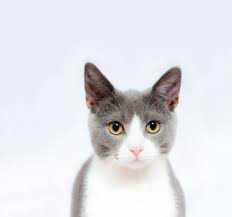

In [3]:
Image.open(file_name)

In [4]:
my_image.shape

(64, 64, 3)

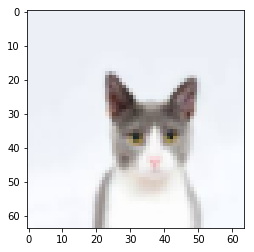

In [5]:
plt.imshow(my_image)

In [6]:
list(saved_model.predict(my_image.reshape(1,64,64,3)))[0]>=0.5

array([ True])